In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0,50,501)

In [3]:
y = np.sin(x)

In [4]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

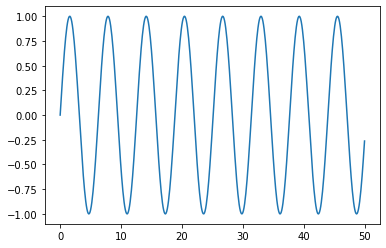

In [5]:
plt.plot(x,y)



In [6]:
df = pd.DataFrame(data=y,index=x,columns=['sine'])




In [7]:
df



,sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [8]:
len(df)

501

In [9]:

test_percent = 0.1

In [10]:
test_point = np.round(len(df)*test_percent)

In [11]:
test_point

50.0

In [12]:
test_ind = int(len(df)-test_point)


In [13]:
test_ind



451

In [14]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [15]:
from sklearn.preprocessing import MinMaxScaler



In [16]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [17]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [18]:
length = 4
batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)



In [19]:
len(scaled_train)

451

In [20]:
len(generator)

447

In [21]:
X,y = generator[0]
print(X)
print(y)
#here x takes 2 value for length 4 and y take 1 value for 1 batch_size

[[[0.49999912]
  [0.54991622]
  [0.59933458]
  [0.64776041]]]
[[0.69470985]]


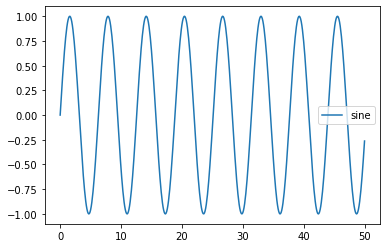

In [22]:
df.plot()

In [23]:
length = 50
batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)



In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [25]:
n_features = 1 #x has only 1 value

In [26]:
model = Sequential()
model.add(SimpleRNN(50,input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit_generator(generator,epochs=5)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 401 steps
Epoch 1/5
401/401 [==============================] - 12s 29ms/step - loss: 0.0043

In [29]:
losses = pd.DataFrame(model.history.history)

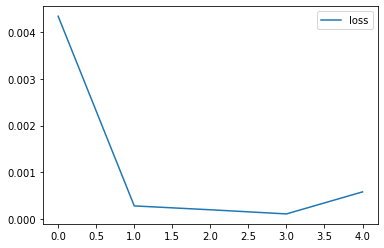

In [30]:
losses.plot()

In [31]:
first_eval_batch = scaled_train[-length:]

In [32]:
first_eval_batch = first_eval_batch.reshape(1,length,n_features)

In [33]:
first_eval_batch

array([[[8.37405820e-01],
        [7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.5

In [34]:
model.predict(first_eval_batch)

array([[0.93200964]], dtype=float32)

In [35]:
scaled_test[0]

array([0.94955134])

In [36]:
# test_predictions =[]
# first_eval_batch = scaled_train[-length:]
# current_batch = first_eval_batch.reshape(1,length,n_features)


In [37]:
# predicted_value = [[[99]]]
# np.append(current_batch[:1:,:],[[[99]]],axis=1)

In [38]:
test_predictions =[]
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1,length,n_features)

for i in range(len(test)):

    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [39]:
test_predictions

[array([0.93200964], dtype=float32),
 array([0.9524745], dtype=float32),
 array([0.96625423], dtype=float32),
 array([0.96719533], dtype=float32),
 array([0.96287423], dtype=float32),
 array([0.95784324], dtype=float32),
 array([0.94776565], dtype=float32),
 array([0.9326249], dtype=float32),
 array([0.91222346], dtype=float32),
 array([0.88700193], dtype=float32),
 array([0.8625725], dtype=float32),
 array([0.83105785], dtype=float32),
 array([0.7925682], dtype=float32),
 array([0.7560305], dtype=float32),
 array([0.7168135], dtype=float32),
 array([0.6707831], dtype=float32),
 array([0.62518495], dtype=float32),
 array([0.5755073], dtype=float32),
 array([0.5235713], dtype=float32),
 array([0.47399932], dtype=float32),
 array([0.41970882], dtype=float32),
 array([0.36372244], dtype=float32),
 array([0.31253994], dtype=float32),
 array([0.25794122], dtype=float32),
 array([0.20194478], dtype=float32),
 array([0.1520891], dtype=float32),
 array([0.10360248], dtype=float32),
 array([0.0

In [40]:
true_prediction = scaler.inverse_transform(test_predictions)

In [41]:
true_prediction



array([[ 0.86401411],
       [ 0.90494346],
       [ 0.93250275],
       [ 0.93438493],
       [ 0.92574281],
       [ 0.91568091],
       [ 0.89552588],
       [ 0.86524458],
       [ 0.82444207],
       [ 0.77399942],
       [ 0.72514093],
       [ 0.66211215],
       [ 0.58513349],
       [ 0.51205866],
       [ 0.4336253 ],
       [ 0.34156523],
       [ 0.25036967],
       [ 0.15101512],
       [ 0.04714401],
       [-0.05199917],
       [-0.16057931],
       [-0.27255116],
       [-0.37491535],
       [-0.48411191],
       [-0.59610388],
       [-0.69581444],
       [-0.7927869 ],
       [-0.89495396],
       [-0.98225358],
       [-1.06583569],
       [-1.14333215],
       [-1.2058534 ],
       [-1.26845295],
       [-1.31718555],
       [-1.34699237],
       [-1.37720253],
       [-1.39896709],
       [-1.39219558],
       [-1.38693825],
       [-1.37456133],
       [-1.33930948],
       [-1.3039792 ],
       [-1.25714368],
       [-1.18981003],
       [-1.12927209],
       [-1

In [42]:
test['predictions'] = true_prediction

C:\Users\aritr\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
test

,sine,predictions
45.1,0.899097,0.864014
45.2,0.938307,0.904943
45.3,0.968142,0.932503
45.4,0.988304,0.934385
45.5,0.998591,0.925743
45.6,0.998900,0.915681
45.7,0.989229,0.895526
45.8,0.969673,0.865245
45.9,0.940429,0.824442
46.0,0.901788,0.773999


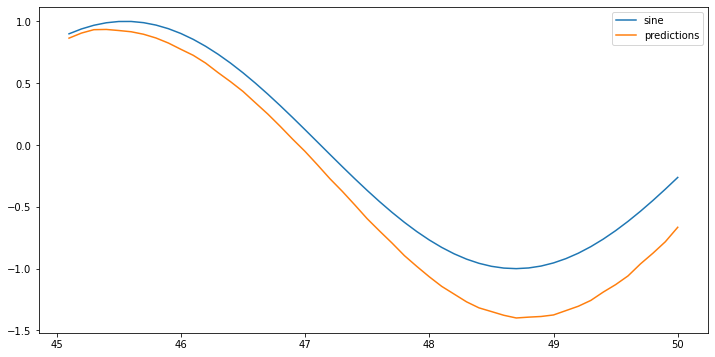

In [44]:
test.plot(figsize=(12,6))

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [46]:
length = 49
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=batch_size)


In [47]:
model = Sequential()
model.add(LSTM(50,input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')


In [48]:
model.fit_generator(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 402 steps, validate for 1 steps
Epoch 1/20
402/402 [==============================] - 8s 20ms/step - loss: 0.0135 - val_loss: 3.5962e-05

In [49]:
test_predictions =[]
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1,length,n_features)

for i in range(len(test)):

    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


C:\Users\aritr\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


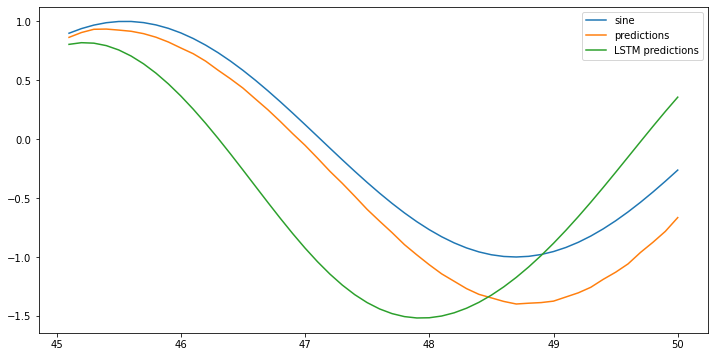

In [50]:
true_prediction = scaler.inverse_transform(test_predictions)
test['LSTM predictions'] = true_prediction
test.plot(figsize=(12,6))


In [51]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)


In [52]:
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,batch_size=batch_size)


In [53]:
model = Sequential()
model.add(LSTM(50,input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')


In [54]:
model.fit_generator(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stop])


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 452 steps, validate for 1 steps
Epoch 1/20
452/452 [==============================] - 4s 8ms/step - loss: 0.0066 - val_loss: 3.5676e-05

In [55]:
forecast =[]
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1,length,n_features)

for i in range(25):

    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [56]:
forecast = scaler.inverse_transform((forecast))

In [57]:
forecast

array([[ 0.89528114],
       [ 0.93147995],
       [ 0.95738451],
       [ 0.97284977],
       [ 0.97787309],
       [ 0.97257821],
       [ 0.95720034],
       [ 0.93206955],
       [ 0.8975945 ],
       [ 0.85424677],
       [ 0.80254874],
       [ 0.7430651 ],
       [ 0.67639378],
       [ 0.6031647 ],
       [ 0.52403743],
       [ 0.4397029 ],
       [ 0.35088554],
       [ 0.25834721],
       [ 0.16289173],
       [ 0.06536751],
       [-0.03332858],
       [-0.13225219],
       [-0.2304131 ],
       [-0.3267804 ],
       [-0.42029475]])

In [58]:
forecast_index = np.arange(50.1,52.6,step=0.1) #25*0.1

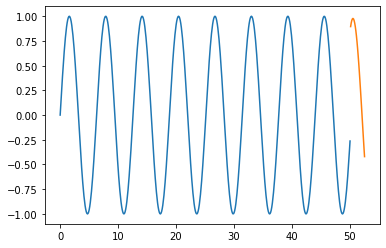

In [67]:
plt.plot(df.index,df['sine'])
plt.plot(forecast_index,forecast)
